In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/tovar_moving.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
data.head()

,qty
date,
2009-12-25,72314.0
2009-12-26,66586.0
2009-12-27,125199.0
2009-12-28,91544.0
2009-12-29,76995.0


In [5]:
train = data.iloc[:-1]
test = data.iloc[-1]

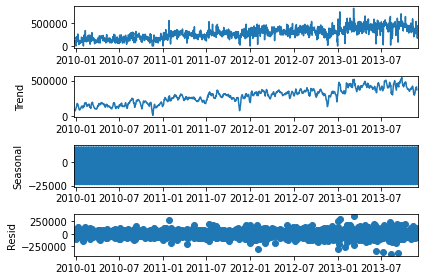

In [7]:
decomposition = seasonal_decompose(data)
decomposition.plot()
plt.show()

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing
ses = ExponentialSmoothing(train)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)
print('Predicted value', exp_pred)
print('Delayed actual value', test)

Predicted value 2013-12-02    225015.522647
Freq: D, dtype: float64
Delayed actual value qty    423846.0
Name: 2013-12-02 00:00:00, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
test = sm.tsa.adfuller(data)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('There are unit roots, the series is not stationary')
else:
    print ('There are no unit roots, the series is stationary')

adf:  -2.2379751493990585
p-value:  0.192752395548408
Critical values:  {'1%': -3.4349700122033804, '5%': -2.8635804131233096, '10%': -2.567856305330816}
There are unit roots, the series is not stationary


In [12]:
data_diff = data.diff(periods=1).dropna()
test = sm.tsa.adfuller(data_diff)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('There are unit roots, the series is not stationary')
else:
    print ('There are no unit roots, the series is stationary')

adf:  -13.821839865226544
p-value:  7.878856681053481e-26
Critical values:  {'1%': -3.4349700122033804, '5%': -2.8635804131233096, '10%': -2.567856305330816}
There are no unit roots, the series is stationary


The order of integration is 1.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


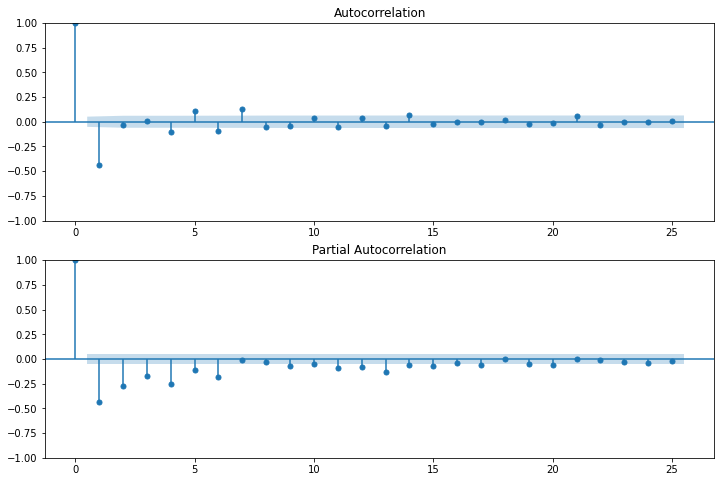

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff, lags=25, ax=ax2)

In [17]:
p = 6

In [19]:
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train, lags=p).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(6)   Log Likelihood              -18221.056
Method:               Conditional MLE   S.D. of innovations          81248.064
Date:                Mon, 16 Jan 2023   AIC                          36458.111
Time:                        18:10:45   BIC                          36500.246
Sample:                    12-31-2009   HQIC                         36473.844
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.047e+04   6160.175      4.946      0.000    1.84e+04    4.25e+04
qty.L1         0.3074      0.026     11.654      0.000       0.256       0.359
qty.L2         0.1582      0.027      5.835      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [21]:
ar_pred = ar_model.predict(start=len(train), end=len(train), dynamic=False)
ar_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2013-12-02    318174.284553
Freq: D, dtype: float64